# model training on imbalanced data

In [116]:
#import necessary libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scikitplot as skplt #pip install scikit-plot==0.3.7
import numpy as np
import seaborn as sns
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [117]:
#load our dataset
data=pd.read_csv("/home/admin-pc/Documents/work/data/aug_train.csv")

In [118]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [119]:
data.drop(['id'],axis=1,inplace=True)

In [120]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [121]:
#lets see the number of data samples belong to the specific class
data['Response'].value_counts()

0    319553
1     62601
Name: Response, dtype: int64

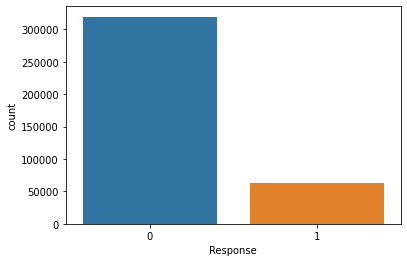

In [122]:
sns.countplot(x=data["Response"])


In [123]:
#encode categorical variable with the help of label encoder
label_encoder = preprocessing.LabelEncoder()

# Encode categorical columns.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Vehicle_Age']= label_encoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage']= label_encoder.fit_transform(data['Vehicle_Damage'])




In [58]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [124]:
def ANN():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.3))
    ann.add(tf.keras.layers.Dense(units=75,activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(units=50,activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.3))
    ann.add(tf.keras.layers.Dense(units=25,activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

    return ann

def measure_accuracy(actual_prediction,model_prediction):
    skplt.metrics.plot_confusion_matrix(actual_prediction,model_prediction, title = 'Confusion Matrix')
    print(classification_report(actual_prediction, model_prediction))

In [125]:
nn=ANN()

In [622]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [623]:
y_train.value_counts()

0    255642
1     50081
Name: Response, dtype: int64

In [624]:
y_test.value_counts()

0    63911
1    12520
Name: Response, dtype: int64

In [625]:
#perform MinMax scaling to normalize our explanatory variables.
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)


In [626]:
#train our model
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 305723 samples
Epoch 1/5
305723/305723 [==============================] - 40s 132us/sample - loss: 0.2939 - acc: 0.8363
Epoch 2/5
305723/305723 [==============================] - 42s 138us/sample - loss: 0.2873 - acc: 0.8369
Epoch 3/5
305723/305723 [==============================] - 39s 128us/sample - loss: 0.2868 - acc: 0.8363
Epoch 4/5
305723/305723 [==============================] - 37s 122us/sample - loss: 0.2864 - acc: 0.8372
Epoch 5/5
305723/305723 [==============================] - 38s 123us/sample - loss: 0.2859 - acc: 0.8366


In [634]:
pred=nn.predict(x_test)
final_pred=np.round(pred)    

/home/admin-pc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin-pc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin-pc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     63911
           1       0.00      0.00      0.00     12520

    accuracy                           0.84     76431
   macro avg       0.42      0.50      0.46     76431
weighted avg       0.70      0.84      0.76     76431



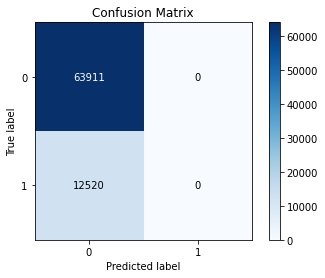

In [635]:
measure_accuracy(y_test, final_pred)

# Handling  Data Imbalance Using Random Undersampling

# Important Note 
### To balance the dataset, we should only apply balancing techniques to the training data and not the testing data. Balancing the testing data can give us inaccurate results. By balancing the training data, we ensure that the model learns from a fair and representative dataset. The testing data should remain unchanged to evaluate the model's performance accurately.

In [636]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [637]:
from sklearn.utils import resample

# Separate majority and minority classes in the training data 
train_data=pd.concat([x_train, y_train],axis=1)
df_majority = train_data[train_data.iloc[:,10]==0]
df_minority = train_data[train_data.iloc[:,10]==1]

#upsample majority class
df_majority_downsampled = resample(df_majority,n_samples=len(df_minority))

In [638]:
x_train_downsample=pd.concat([df_majority_downsampled, df_minority])

In [639]:
x_train_downsample['Response'].value_counts()

1    50081
0    50081
Name: Response, dtype: int64

In [640]:
x_train=x_train_downsample.iloc[:,:10]
y_train=x_train_downsample.iloc[:,10]

In [641]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)

In [642]:
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 100162 samples
Epoch 1/5
100162/100162 [==============================] - 15s 153us/sample - loss: 0.3863 - acc: 0.8288
Epoch 2/5
100162/100162 [==============================] - 14s 136us/sample - loss: 0.3812 - acc: 0.8303
Epoch 3/5
100162/100162 [==============================] - 13s 131us/sample - loss: 0.3796 - acc: 0.8316
Epoch 4/5
100162/100162 [==============================] - 13s 125us/sample - loss: 0.3787 - acc: 0.8304
Epoch 5/5
100162/100162 [==============================] - 13s 127us/sample - loss: 0.3783 - acc: 0.8305


In [643]:
pred=nn.predict(x_test)
final_pred=np.round(pred)

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     63911
           1       0.41      0.92      0.57     12520

    accuracy                           0.77     76431
   macro avg       0.70      0.83      0.71     76431
weighted avg       0.89      0.77      0.80     76431



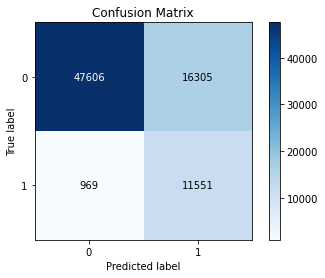

In [644]:
measure_accuracy(Y_test,final_pred)

# Handling Imbalance Data Using Random oversampling

In [12]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [646]:
from sklearn.utils import resample

# Separate majority and minority classes in the training data 
train_data=pd.concat([x_train, y_train],axis=1)
df_majority = train_data[train_data.iloc[:,10]==0]
df_minority = train_data[train_data.iloc[:,10]==1]

#upsample majority class
df_minority_upsampled = resample(df_minority,n_samples=len(df_majority))

In [647]:
#Combine the upsampled minority class data with the majority class data.
x_train_upsample=pd.concat([df_minority_upsampled, df_majority])

In [648]:
x_train_upsample['Response'].value_counts()

1    255642
0    255642
Name: Response, dtype: int64

In [649]:
x_train=x_train_upsample.iloc[:,:10]
y_train=x_train_upsample.iloc[:,10]

In [650]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)


In [651]:
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 511284 samples
Epoch 1/5
511284/511284 [==============================] - 64s 126us/sample - loss: 0.3772 - acc: 0.8304
Epoch 2/5
511284/511284 [==============================] - 63s 122us/sample - loss: 0.3769 - acc: 0.8303
Epoch 3/5
511284/511284 [==============================] - 62s 121us/sample - loss: 0.3762 - acc: 0.8305
Epoch 4/5
511284/511284 [==============================] - 62s 121us/sample - loss: 0.3755 - acc: 0.8306
Epoch 5/5
511284/511284 [==============================] - 62s 122us/sample - loss: 0.3754 - acc: 0.8309


In [652]:
pred=nn.predict(x_test)
final_pred=np.round(pred)


              precision    recall  f1-score   support

           0       0.98      0.74      0.85     63911
           1       0.41      0.93      0.57     12520

    accuracy                           0.77     76431
   macro avg       0.70      0.83      0.71     76431
weighted avg       0.89      0.77      0.80     76431



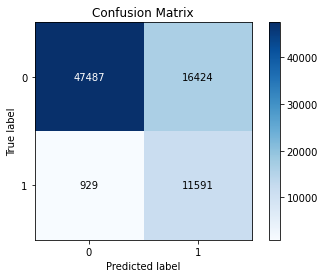

In [653]:
measure_accuracy(y_test, final_pred)

In [64]:
## perform balancing on only training part 

In [ ]:
## We need to perform a trial and error process to determine whether this approach is suitable 
# smote
# adasyn

In [ ]:
# what is data imbalance
# what are the consequences of data imbalance 
# how to handle data imbalance using techniques such as random undersampling and random oversampling

# SMOTE ( Synthetice Minority Oversampling Technique)

In [98]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [99]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',k_neighbors=10)
x_train,y_train= sm.fit_resample(x_train,y_train)


In [101]:
y_train.value_counts()

1    255642
0    255642
Name: Response, dtype: int64

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)


In [103]:
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 511284 samples
Epoch 1/5
511284/511284 [==============================] - 52s 101us/sample - loss: 0.3470 - acc: 0.8473
Epoch 2/5
511284/511284 [==============================] - 47s 92us/sample - loss: 0.3362 - acc: 0.8528
Epoch 3/5
511284/511284 [==============================] - 48s 94us/sample - loss: 0.3344 - acc: 0.8531
Epoch 4/5
511284/511284 [==============================] - 48s 93us/sample - loss: 0.3336 - acc: 0.8540
Epoch 5/5
511284/511284 [==============================] - 49s 96us/sample - loss: 0.3330 - acc: 0.8541


In [104]:
pred=nn.predict(x_test)
final_pred=np.round(pred)

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     63911
           1       0.44      0.82      0.58     12520

    accuracy                           0.80     76431
   macro avg       0.70      0.81      0.72     76431
weighted avg       0.87      0.80      0.82     76431



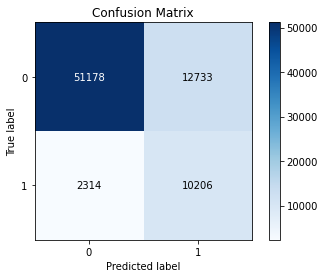

In [105]:
measure_accuracy(y_test, final_pred)

# Borderline SMOTE

In [106]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [107]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [108]:
from imblearn.over_sampling import BorderlineSMOTE
borderine_SMOTE=BorderlineSMOTE()
x_train,y_train= borderine_SMOTE.fit_resample(x_train,y_train)

In [109]:
y_train.value_counts()

1    255642
0    255642
Name: Response, dtype: int64

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)

In [111]:
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 511284 samples
Epoch 1/5
511284/511284 [==============================] - 50s 97us/sample - loss: 0.3282 - acc: 0.8580
Epoch 2/5
511284/511284 [==============================] - 48s 93us/sample - loss: 0.3281 - acc: 0.8580
Epoch 3/5
511284/511284 [==============================] - 46s 90us/sample - loss: 0.3275 - acc: 0.8584
Epoch 4/5
511284/511284 [==============================] - 47s 93us/sample - loss: 0.3272 - acc: 0.8584
Epoch 5/5
511284/511284 [==============================] - 47s 93us/sample - loss: 0.3266 - acc: 0.8587


In [112]:
pred=nn.predict(x_test)
final_pred=np.round(pred)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     63911
           1       0.44      0.87      0.58     12520

    accuracy                           0.79     76431
   macro avg       0.70      0.83      0.72     76431
weighted avg       0.88      0.79      0.82     76431



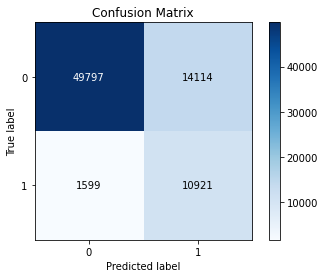

In [113]:
measure_accuracy(y_test, final_pred)

# ADASYN (adaptive synthetic sampling) 

In [115]:
# 1.handling data imbalance using random undersampling ad random oversampling
# 2.handling data imbalance using SMOTE and Borderline SMOTE
# covered this points of video on  
# what is data imbalance
# what are the consequences of data imbalance 
# step by step details of each and every technique that we use to handle data imbalance
# how to handle data imbalance using techniques such as random undersampling and random oversampling

In [128]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [129]:
#combine all explainatory variables
explainatory_variables=data.iloc[:,0:10]
target_variable=data.iloc[:,10]

#it's important to make sure that the proportion of different classes in the original dataset is maintained in both the training and testing sets.
x_train,x_test,y_train,y_test = train_test_split(explainatory_variables,target_variable,test_size=0.2,random_state=0,stratify=target_variable)

In [130]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x_train,y_train= adasyn.fit_resample(x_train,y_train)

In [131]:
y_train.value_counts()

1    261027
0    255642
Name: Response, dtype: int64

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test    = scaler.fit_transform(x_test)

In [133]:
nn.fit((np.array(x_train)),(np.array(y_train)),batch_size=32,epochs = 5)

Train on 516669 samples
Epoch 1/5
516669/516669 [==============================] - 53s 103us/sample - loss: 0.3524 - acc: 0.8433
Epoch 2/5
516669/516669 [==============================] - 51s 98us/sample - loss: 0.3420 - acc: 0.8477
Epoch 3/5
516669/516669 [==============================] - 52s 101us/sample - loss: 0.3404 - acc: 0.8488
Epoch 4/5
516669/516669 [==============================] - 52s 101us/sample - loss: 0.3396 - acc: 0.8494
Epoch 5/5
516669/516669 [==============================] - 50s 97us/sample - loss: 0.3389 - acc: 0.8494


In [134]:
pred=nn.predict(x_test)
final_pred=np.round(pred)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     63911
           1       0.43      0.87      0.58     12520

    accuracy                           0.79     76431
   macro avg       0.70      0.82      0.72     76431
weighted avg       0.88      0.79      0.82     76431



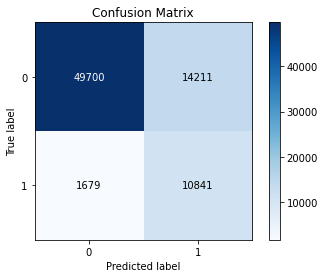

In [135]:
measure_accuracy(y_test, final_pred)

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X, Y= sm.fit_resample(data.iloc[:,0:11],data.iloc[:,11])
#X_test, Y_test = sm.fit_resample(X_test,Y_test)


In [9]:
Y.value_counts()

1    319553
0    319553
Name: Response, dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=10)

In [13]:
Y_test.value_counts()

1    63911
0    63911
Name: Response, dtype: int64

In [95]:
Y_train.ravel()

array([0, 1, 0, ..., 1, 1, 1])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test    = scaler.transform(X_test)

In [18]:
nn.fit((np.array(X_train)),(np.array(Y_train)),batch_size=32,epochs = 10)

Train on 511284 samples
Epoch 1/10
511284/511284 [==============================] - 51s 100us/sample - loss: 0.3250 - acc: 0.8461
Epoch 2/10
511284/511284 [==============================] - 51s 100us/sample - loss: 0.3049 - acc: 0.8562
Epoch 3/10
511284/511284 [==============================] - 51s 99us/sample - loss: 0.3014 - acc: 0.8572
Epoch 4/10
511284/511284 [==============================] - 50s 98us/sample - loss: 0.2999 - acc: 0.8581
Epoch 5/10
511284/511284 [==============================] - 54s 105us/sample - loss: 0.2990 - acc: 0.8585
Epoch 6/10
511284/511284 [==============================] - 50s 98us/sample - loss: 0.2982 - acc: 0.8591
Epoch 7/10
511284/511284 [==============================] - 51s 100us/sample - loss: 0.2975 - acc: 0.8592
Epoch 8/10
511284/511284 [==============================] - 51s 101us/sample - loss: 0.2970 - acc: 0.8593
Epoch 9/10
511284/511284 [==============================] - 51s 99us/sample - loss: 0.2966 - acc: 0.8596
Epoch 10/10
511284/511284 

In [49]:
pred=nn.predict(X_test)
final_pred=np.round(pred)
# pred=nn.predict(X_test)
# final_pred=[]
# for i in pred:
#     final_pred.append(np.argmax(i))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82     63911
           1       0.78      0.92      0.85     63911

    accuracy                           0.83    127822
   macro avg       0.84      0.83      0.83    127822
weighted avg       0.84      0.83      0.83    127822



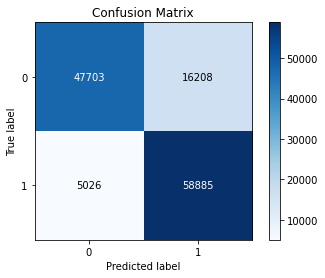

In [51]:
measure_accuracy(Y_test,final_pred)